In [5]:
import pandas
import os

In [2]:
import pandas as pd

#### merge the 12 months data

In [13]:

files=[file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()    #this is for creating empty data frame
#creating concate data frame
for file in files:
    
    df = pd.read_csv("./Sales_Data/" + file)
    
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv",index=False)    

In [14]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# clean the data

In [16]:
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
95,176648,27in FHD Monitor,1,149.99,04/24/19 01:17,"732 2nd St, Portland, OR 97035",04
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016",04
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215",04
98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215",04


# drop the NAN 

In [18]:
nan_df =all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
all_data=all_data.dropna(how='all')

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


Augment data with additional columns

# task 2: add month column

In [21]:
all_data['month']= all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


# find 'or' and delete it

In [25]:
all_data =all_data[all_data['Order Date'].str[0:2]!='Or']

convert columns to the correct type 

In [31]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])# make to int 
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) # to float

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# augment data with additional columns

task add month column

In [28]:
all_data['month']=all_data['Order Date'].str[0:2]
all_data['month']=all_data['month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Task 3: add a sales column

In [93]:
all_data['sale']=all_data['Quantity Ordered']*all_data['Price Each']

# add the city column 

In [91]:
# let's use apply() function 
all_data['City']=all_data['Purchase Address'].apply(lambda x:x.split(",")[1]+" "+"("+x.split(",")[2].split(" ")[1]+")")


In [38]:
all_data.groupby('month').sum()['sale']

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sale, dtype: float64

In [45]:
results=all_data.groupby('month').sum()
results.head()

,Quantity Ordered,Price Each,sale
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


In [39]:
import matplotlib.pyplot as plt

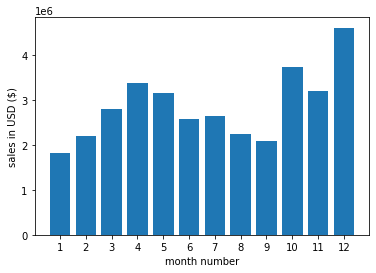

In [48]:
month=range(1,13)
plt.bar(month,results['sale'])
plt.xticks(months)
plt.ylabel("sales in USD ($)")
plt.xlabel('month number')
plt.show()

#### what city had the higest number of sales

In [90]:
results= all_data.groupby('City',as_index=False).sum()




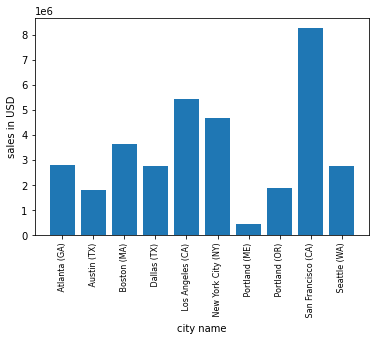

In [88]:
cities=results['City']
plt.bar(cities,results['sale'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('sales in USD')
plt.xlabel('city name')
plt.show()

# Question : what time should we display advertisements to maximize likelihood of customer's buying product?

In [95]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [100]:
all_data['hour']=all_data['Order Date'].dt.hour
all_data['minute']= all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale,City,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [ ]:
hours = [hour for hour, df in all ]

#### what was the best month for sales